## Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read data & analysis


In [ ]:
df=pd.read_excel('/content/Churn_Modelling.xlsx')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
le=LabelEncoder()
df1['Geography']=le.fit_transform(df1['Geography'])
df1['Gender']=le.fit_transform(df1['Gender'])


In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(df1['Geography'].values.reshape(-1,1)).toarray()

values = dict(df1["Geography"].value_counts())

for e , (val , _) in enumerate(values.items()):
    df1["Geography" + str(val)] = part[:,e]

df1 = df1.drop(["Geography"] , axis = 1)

df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography0,Geography1,Geography2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


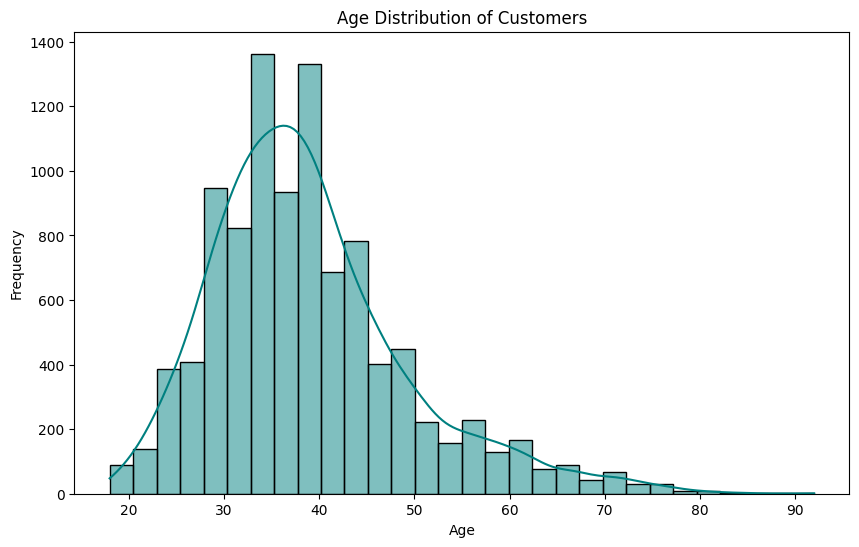

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-51-98250bb0cefc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Balance', data=df1, palette='coolwarm')


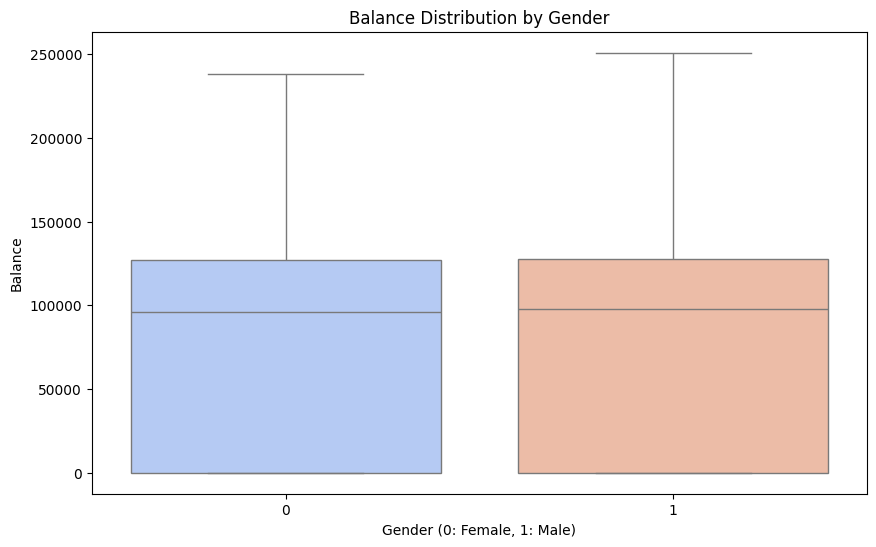

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Balance', data=df1, palette='coolwarm')
plt.title('Balance Distribution by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Balance')
plt.show()

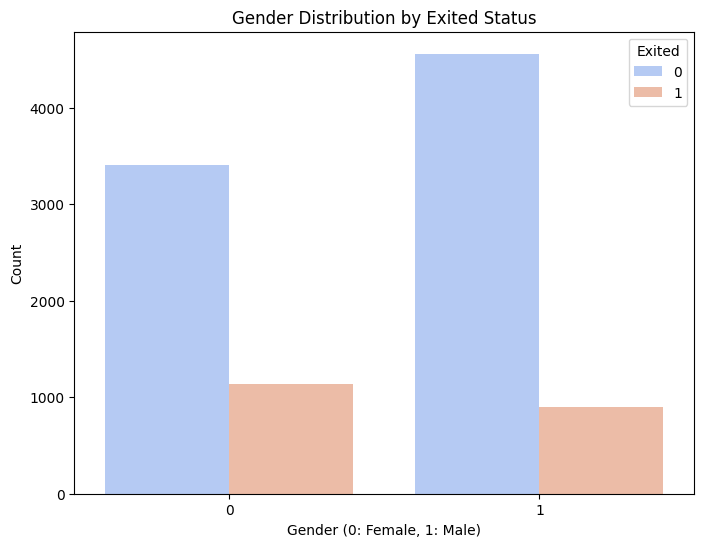

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df1, palette='coolwarm')
plt.title('Gender Distribution by Exited Status')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Geography0       10000 non-null  float64
 11  Geography1       10000 non-null  float64
 12  Geography2       10000 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1015.8 KB


<Axes: >

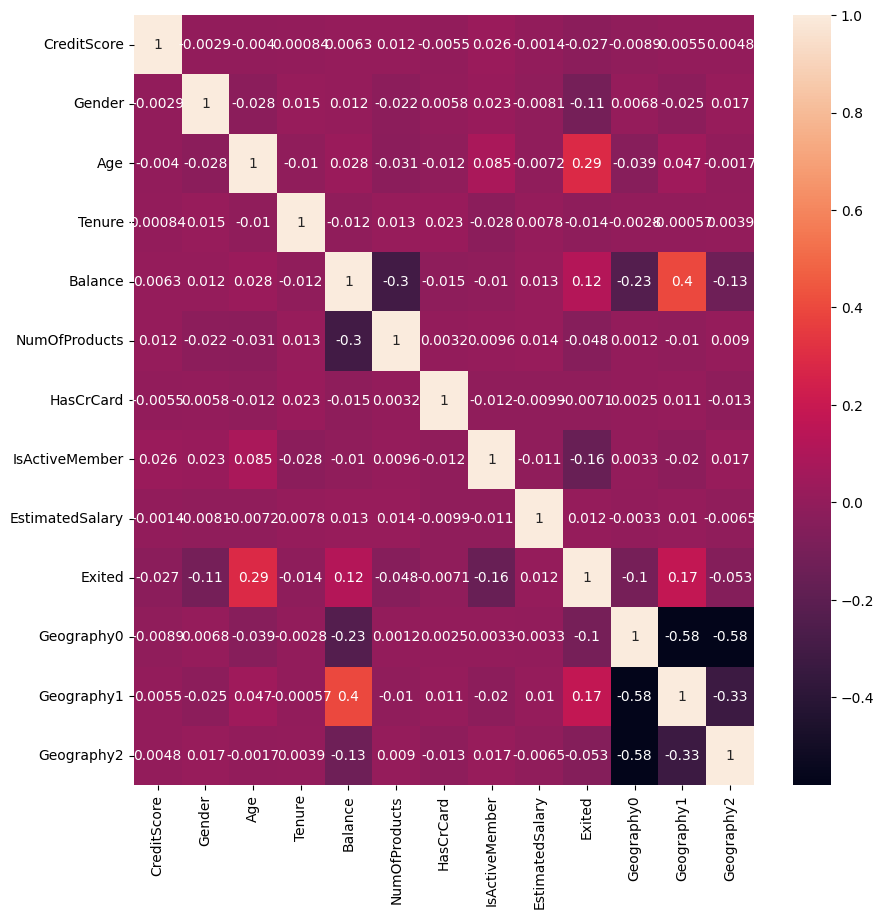

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

corr = df1.corr()
sns.heatmap(corr , annot = True , ax=ax)

In [ ]:
X=df1.drop('Exited',axis=1)
y=df1['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [ ]:
X_train.shape , X_test.shape

((8000, 12), (2000, 12))

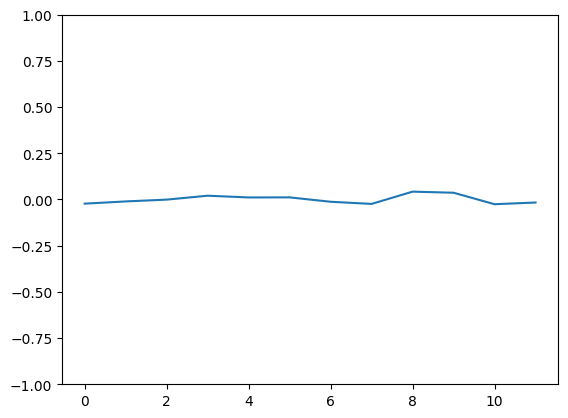

In [ ]:
plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means , scaley=False)

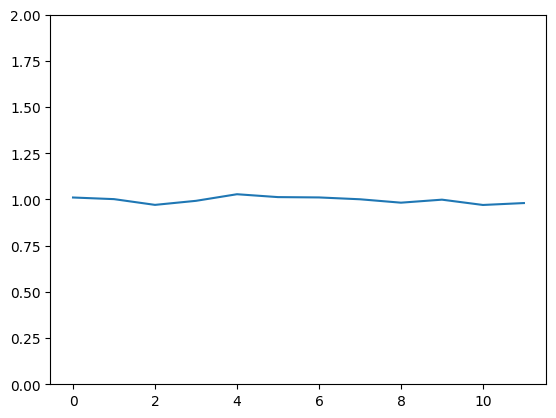

In [ ]:
plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(X_test[:,i]))
plt.plot(vars)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train , y_train)

model.score(X_test,y_test)

0.8215

In [ ]:
model.coef_

array([[-0.03444651, -0.25435422,  0.75093096, -0.05445845,  0.20181171,
        -0.06473687, -0.04270295, -0.53682421,  0.03456902, -0.11088871,
         0.21209781, -0.08503169]])

In [ ]:
model.intercept_

array([-1.63966082])

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
# Example of computing sigmoid for a given inputdef
def logistic_regression_predict(features, weights, bias):
     z = np.dot(features, weights) + bias
     return sigmoid(z)

In [ ]:
logistic_regression_predict(X_test,model.coef_[0],model.intercept_[0])

array([0.21148505, 0.14994524, 0.10193114, ..., 0.29535186, 0.34379591,
       0.12324027])

## Kfold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np



In [ ]:
# Assuming X and y are your features and target variable
X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [ ]:
# Initialize the model
model = LogisticRegression()

In [ ]:
# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

In [ ]:
# Print the cross-validation results
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Accuracy: ", np.mean(cv_scores))

Cross-Validation Accuracy Scores:  [0.8005 0.789  0.7805 0.791  0.791 ]
Mean Accuracy:  0.7904


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [ ]:

model = LogisticRegression()
model.fit(X_train_selected, y_train)


LogisticRegression()

In [ ]:
selected_features = X.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'Geography0', 'Geography1', 'Geography2'],
      dtype='object')


In [ ]:
model.score(X_test_selected,y_test)

0.798

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 4 , n_jobs = -1)
rfecv.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

In [ ]:
rfecv.support_

array([False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True])

In [ ]:
rfecv.ranking_

array([2, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1])

In [ ]:
selected_features = np.where(rfecv.support_)[0]
X_train = X_train.iloc[:,selected_features] # Use .iloc for integer-based indexing
X_test = X_test.iloc[:,selected_features]   # Use .iloc for integer-based indexing

In [ ]:
model.fit(X_train , y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[-0.52105605,  0.07125871, -0.01440256, -0.17066028, -0.0299452 ,
        -1.06600149, -1.10750251, -0.19264342, -1.02074883]])

In [ ]:
model.intercept_

array([-2.35510062])

In [ ]:
model.score(X_test , y_test)

0.815

In [ ]:
def Accuracy(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
def Accuracy(Truths , Predictions):
  return np.mean(Truths == Predictions)
predictions = model.predict(X_test)
print("Validation Accuracy :", Accuracy(y_test ,predictions))

Validation Accuracy : 0.815


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
print("Precision : ", precision_score(y_test , predictions))

Precision :  0.5815602836879432


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("Recall : ", recall_score(y_test , predictions))

Recall :  0.20865139949109415
